In [ ]:
import tensorflow as tf
from tensorflow.keras import  datasets , layers , models
import matplotlib.pyplot as plt
import numpy as np


**Downloading  Dataset.**

In [ ]:
(X_train , y_train), (X_test, y_test) = datasets.cifar10.load_data()
X_train.shape


170508288/170498071 [==============================] - 2s 0us/step


(50000, 32, 32, 3)

In [ ]:
print('Training Images: {}'.format(X_train.shape))
print('Testing Images: {}'.format(X_train.shape))


Training Images: (50000, 32, 32, 3)
Testing Images: (50000, 32, 32, 3)


In [ ]:
print(X_train[0].shape)

(32, 32, 3)


In [ ]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

**Declaration of Classes**

In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

**Normalizing the dataset**

In [ ]:
seed = 6
np.random.seed(seed)


X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [ ]:
X_train = X_train / 255
X_test = X_test / 255

**Validating Normalised dataset**

In [ ]:
print(X_train[0])

**Model building**

In [ ]:
import tensorflow as tf

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D , MaxPool2D , Dropout

**Initial Model**

In [ ]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same',activation = 'relu', input_shape=[32,32,3]))


model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same',activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2),padding = 'valid'))
model.add(Dropout(0.5))

model.add(Conv2D(filters=128, kernel_size=(5,5), padding='same',activation = 'relu'))
model.add(MaxPool2D(pool_size=(4,4),padding = 'valid'))
model.add(Dropout(0.5))


model.add(Flatten())
model.add(Dense(units = 128, activation ='relu'))
model.add(Dense(units=10, activation = 'softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       204928    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 4, 4, 128)         0

**Comparing Training accuracy with Validation Accuracy**

In [ ]:
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics= ['sparse_categorical_accuracy'])

In [ ]:
history = model.fit(X_train, y_train, batch_size=10, epochs=10, verbose=1, validation_data=(X_test, y_test))

Epoch 1/10
5000/5000 [==============================] - 83s 11ms/step - loss: 1.4465 - sparse_categorical_accuracy: 0.4749 - val_loss: 1.1589 - val_sparse_categorical_accuracy: 0.6026
Epoch 2/10
5000/5000 [==============================] - 49s 10ms/step - loss: 1.1142 - sparse_categorical_accuracy: 0.6044 - val_loss: 0.9612 - val_sparse_categorical_accuracy: 0.6827
Epoch 3/10
5000/5000 [==============================] - 52s 10ms/step - loss: 1.0127 - sparse_categorical_accuracy: 0.6416 - val_loss: 0.9351 - val_sparse_categorical_accuracy: 0.7008
Epoch 4/10
5000/5000 [==============================] - 57s 11ms/step - loss: 0.9485 - sparse_categorical_accuracy: 0.6659 - val_loss: 0.8944 - val_sparse_categorical_accuracy: 0.7097
Epoch 5/10
5000/5000 [==============================] - 53s 11ms/step - loss: 0.9172 - sparse_categorical_accuracy: 0.6773 - val_loss: 0.8238 - val_sparse_categorical_accuracy: 0.7189
Epoch 6/10
5000/5000 [==============================] - 55s 11ms/step - loss: 0.

**Graphical representation**

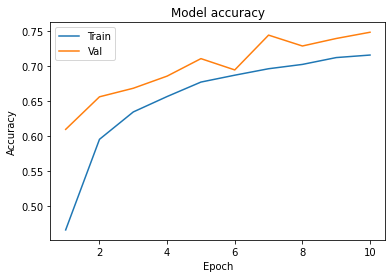

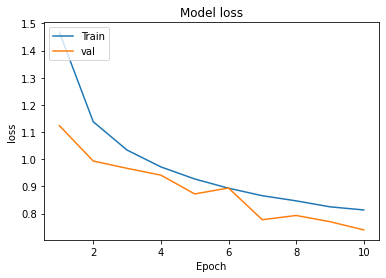

In [ ]:
epoch_range = range(1, 11)
plt.plot(epoch_range, history.history['sparse_categorical_accuracy'])
plt.plot(epoch_range, history.history['val_sparse_categorical_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Val'], loc='upper left')
plt.show()

plt.plot(epoch_range, history.history['loss'])
plt.plot(epoch_range, history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train','val'], loc='upper left')
plt.show()

**Final Model**

In [ ]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same',activation = 'relu', input_shape=[32,32,3]))


model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same',activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2),padding = 'valid'))


model.add(Conv2D(filters=128, kernel_size=(5,5), padding='same',activation = 'relu'))
model.add(MaxPool2D(pool_size=(4,4),strides=(2,2),padding = 'valid'))


model.add(Conv2D(filters=128, kernel_size=(5,5), padding='same',activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2),padding = 'valid'))


model.add(Dropout(0.2))


model.add(Flatten())
model.add(Dense(units = 128, activation ='relu'))
model.add(Dense(units=10, activation = 'softmax'))

In [ ]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 128)       204928    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 7, 7, 128)         409728    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 3, 3, 128)        

In [ ]:
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics= ['sparse_categorical_accuracy'])

**Testing Accuracy of the model**

In [ ]:
history = model.fit(X_train, y_train, batch_size=10, epochs=15, verbose=1, validation_data=(X_test, y_test))

Epoch 1/15
5000/5000 [==============================] - 716s 143ms/step - loss: 1.4431 - sparse_categorical_accuracy: 0.4719 - val_loss: 1.0986 - val_sparse_categorical_accuracy: 0.6155
Epoch 2/15
5000/5000 [==============================] - 704s 141ms/step - loss: 0.9931 - sparse_categorical_accuracy: 0.6496 - val_loss: 0.9325 - val_sparse_categorical_accuracy: 0.6823
Epoch 3/15
5000/5000 [==============================] - 700s 140ms/step - loss: 0.8423 - sparse_categorical_accuracy: 0.7055 - val_loss: 0.8116 - val_sparse_categorical_accuracy: 0.7215
Epoch 4/15
5000/5000 [==============================] - 701s 140ms/step - loss: 0.7572 - sparse_categorical_accuracy: 0.7365 - val_loss: 0.8062 - val_sparse_categorical_accuracy: 0.7254
Epoch 5/15
5000/5000 [==============================] - 702s 140ms/step - loss: 0.6910 - sparse_categorical_accuracy: 0.7583 - val_loss: 0.8241 - val_sparse_categorical_accuracy: 0.7313
Epoch 6/15
 587/5000 [==>...........................] - ETA: 9:46 - lo

**Graphical Representation**

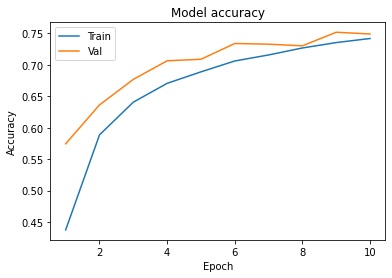

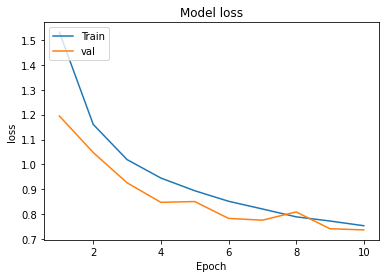

In [ ]:
epoch_range = range(1, 11)
plt.plot(epoch_range, history.history['sparse_categorical_accuracy'])
plt.plot(epoch_range, history.history['val_sparse_categorical_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Val'], loc='upper left')
plt.show()

plt.plot(epoch_range, history.history['loss'])
plt.plot(epoch_range, history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train','val'], loc='upper left')
plt.show()